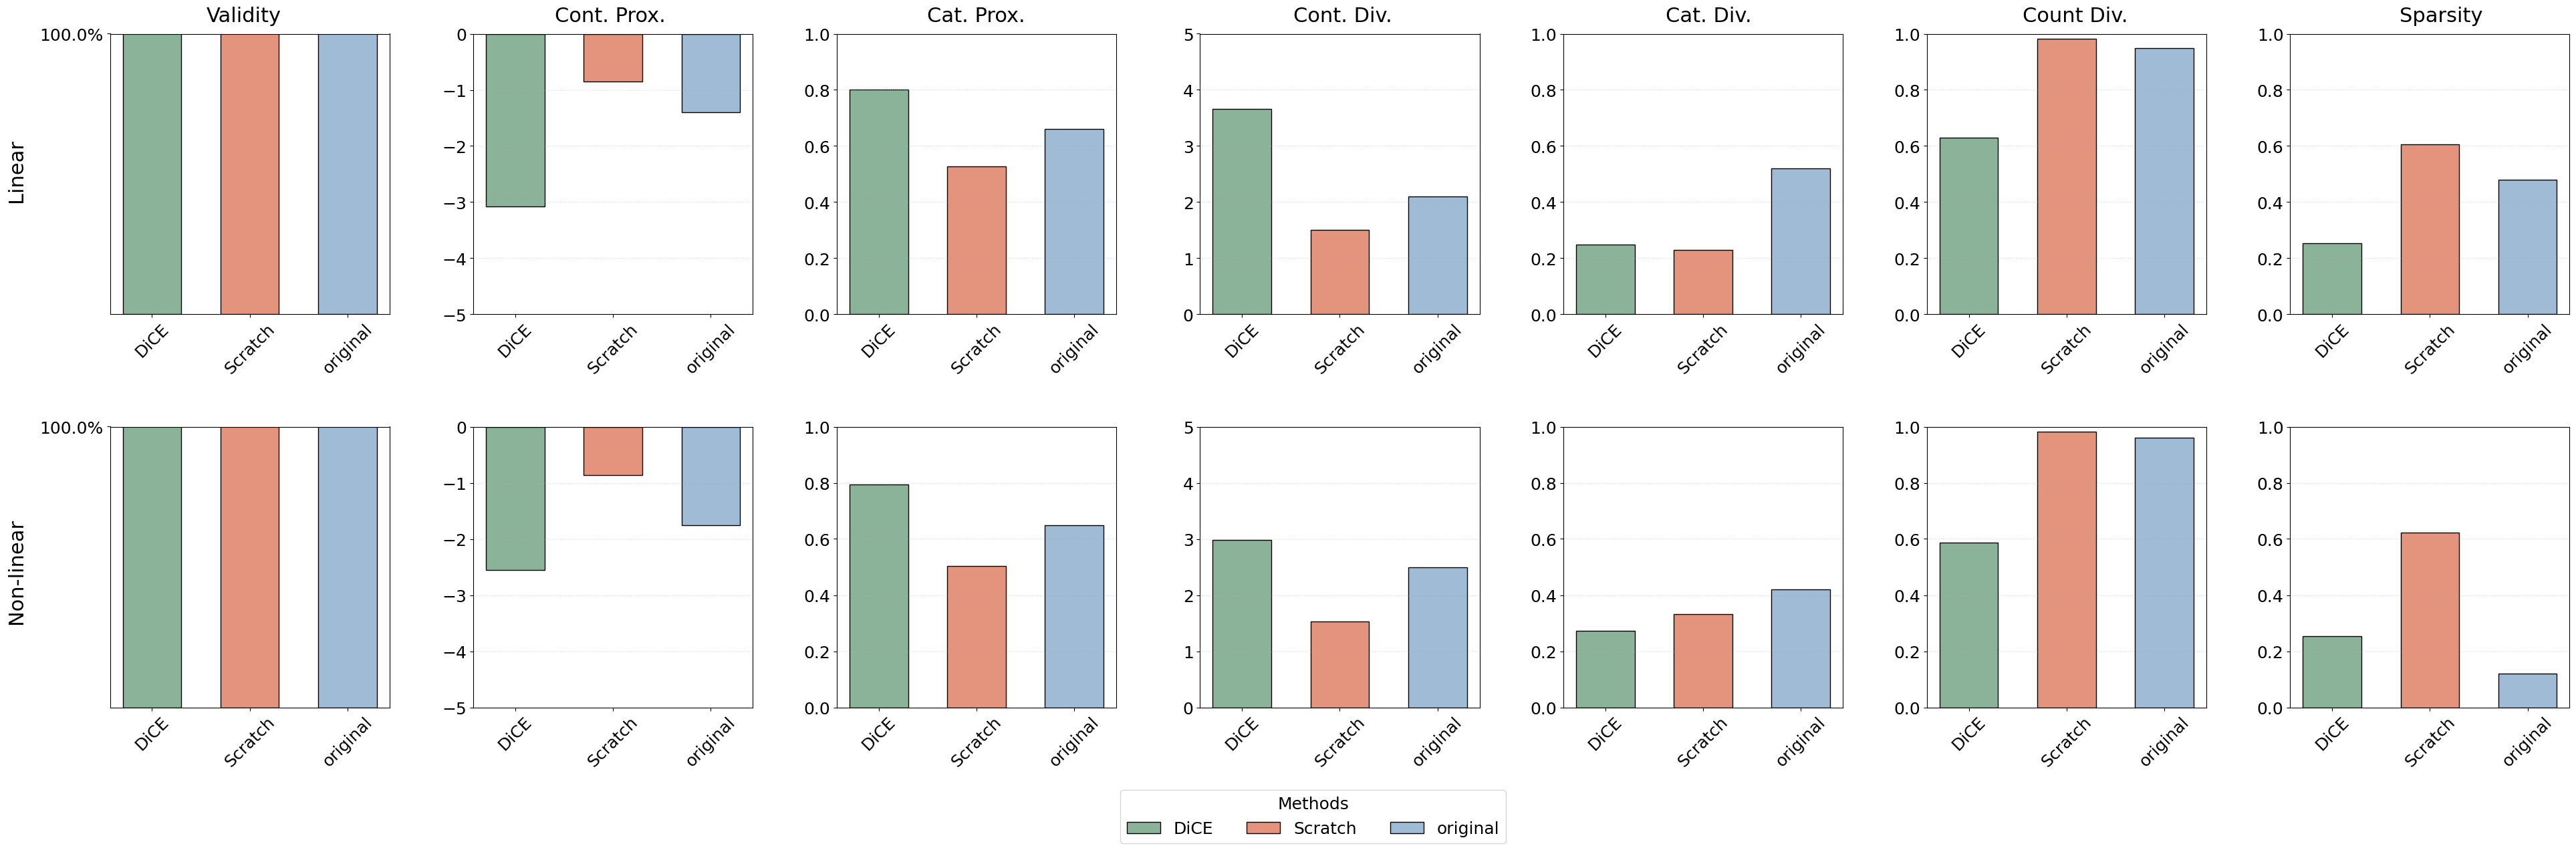

In [1]:
import matplotlib.pyplot as plt

data = [
    {"Method": "LogReg (DiCE)", "Validity": 100.0, "Cont. Prox.": -3.0761, "Cat. Prox.": 0.8010,
     "Cont. Div.": 3.6581, "Cat. Div.": 0.2486, "Count Div.": 0.6295, "Sparsity": 0.2527},
    {"Method": "LogReg (Scratch)", "Validity": 100.0, "Cont. Prox.": -0.8508, "Cat. Prox.": 0.5262,
     "Cont. Div.": 1.5086, "Cat. Div.": 0.2286, "Count Div.": 0.9825, "Sparsity": 0.6053},
    {"Method": "LogReg (original)", "Validity": 100.0, "Cont. Prox.": -1.4, "Cat. Prox.": 0.66,
     "Cont. Div.": 2.1, "Cat. Div.": 0.52, "Count Div.": 0.95, "Sparsity": 0.48},
    {"Method": "MLP (DiCE)", "Validity": 100.0, "Cont. Prox.": -2.5579, "Cat. Prox.": 0.7942,
     "Cont. Div.": 2.9823, "Cat. Div.": 0.2728, "Count Div.": 0.5869, "Sparsity": 0.2545},
    {"Method": "MLP (Scratch)", "Validity": 100.0, "Cont. Prox.": -0.8580, "Cat. Prox.": 0.5033,
     "Cont. Div.": 1.5312, "Cat. Div.": 0.3333, "Count Div.": 0.9825, "Sparsity": 0.6225},
    {"Method": "MLP (original)", "Validity": 100.0, "Cont. Prox.": -1.76, "Cat. Prox.": 0.65,
     "Cont. Div.": 2.5, "Cat. Div.": 0.42, "Count Div.": 0.96, "Sparsity": 0.12}
]

plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'legend.title_fontsize': 18
})

colors = {"DiCE": "#8BB39A", "Scratch": "#E4937C", "original": "#9fbbd5"}
metrics = ["Validity", "Cont. Prox.", "Cat. Prox.", "Cont. Div.", "Cat. Div.", "Count Div.", "Sparsity"]

y_limits = {
    "Validity": (0, 100),
    "Cont. Prox.": (-5, 0),
    "Cat. Prox.": (0, 1.0),
    "Cont. Div.": (0, 5),
    "Cat. Div.": (0, 1),
    "Count Div.": (0.0, 1.0),
    "Sparsity": (0, 1.0)
}


fig, axs = plt.subplots(2, 7, figsize=(40, 12),
                       gridspec_kw={"left":0.05, "right":0.97, "top":0.92, "bottom":0.08})
plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.3)


for col_idx, metric in enumerate(metrics):
    fig.text(x=0.1 + col_idx*0.137,
            y=0.93,
            s=metric,
            ha="center",
            va="bottom",
            fontsize=22)

model_labels = ["Linear", "Non-linear"]
for row_idx, label in enumerate(model_labels):
    fig.text(x=0.015,
            y=0.75 - row_idx*0.5,
            s=label,
            rotation=90,
            ha="center",
            va="center",
            fontsize=22)

model_groups = {
    "Linear": [d for d in data if "LogReg" in d["Method"]],
    "Non-linear": [d for d in data if "MLP" in d["Method"]]
}

for row_idx, model_type in enumerate(model_labels):
    models = model_groups[model_type]

    for col_idx, metric in enumerate(metrics):
        ax = axs[row_idx, col_idx]
        variants = [m["Method"].split("(")[-1].split(")")[0].strip() for m in models]
        values = [m[metric] for m in models]

        bars = ax.bar(variants, values,
                    color=[colors[v] for v in variants],
                    edgecolor="black",
                    width=0.6)

        ax.set_ylim(y_limits[metric])
        ax.tick_params(axis="x", rotation=45, labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        ax.grid(axis="y", linestyle=":", alpha=0.5)


        for spine in ax.spines.values():
            spine.set_visible(True)


        if metric == "Validity":
            ax.yaxis.set_major_formatter('{x:.1f}%')
            ax.set_yticks([100.0])


legend_handles = [plt.Rectangle((0,0),1,1, color=colors[v], ec="black") for v in colors]
fig.legend(
    handles=legend_handles,
    labels=colors.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    title="Methods",
    fontsize=18,
    frameon=True,
    borderaxespad=0.5
)

plt.show()

Counterfactual Counts Before/After Filtering

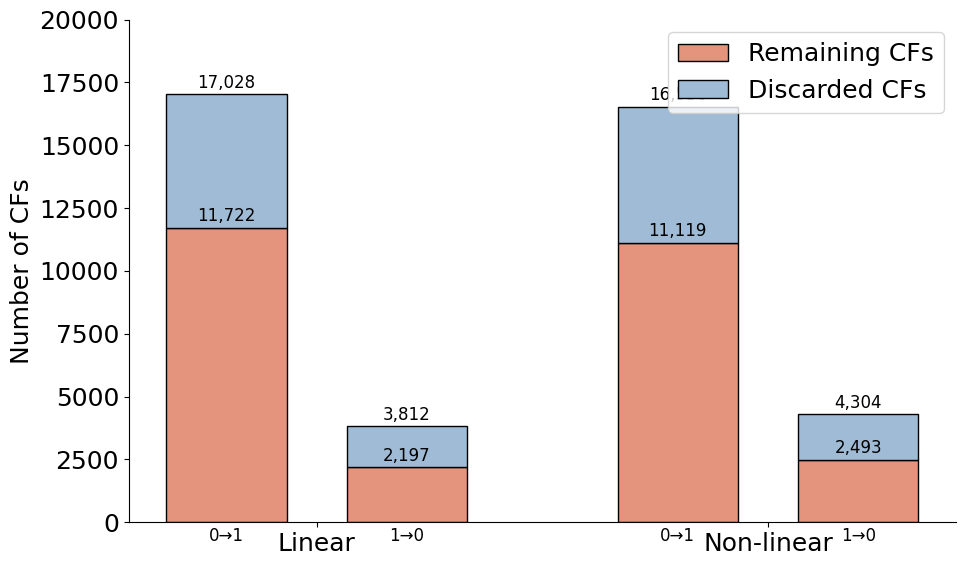

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

models = ['Linear', 'Non-linear']
directions = ['0→1', '1→0']

original = [17028, 3812, 16536, 4304]
filtered = [11722, 2197, 11119, 2493]

discarded = [o - f for o, f in zip(original, filtered)]

x = np.arange(len(models)) * 3
bar_width = 0.8
offset = 1.2

plt.figure(figsize=(10, 6))


for i, model in enumerate(models):
    plt.bar(x[i] - offset/2, filtered[i*2], width=bar_width,
            color='#E4937C', edgecolor='black', label='Filtered CFs' if i==0 else "")
    plt.bar(x[i] - offset/2, discarded[i*2], width=bar_width,
            bottom=filtered[i*2], color='#9fbbd5', edgecolor='black', label='Discarded CFs' if i==0 else "")

    plt.bar(x[i] + offset/2, filtered[i*2+1], width=bar_width,
            color='#E4937C', edgecolor='black')
    plt.bar(x[i] + offset/2, discarded[i*2+1], width=bar_width,
            bottom=filtered[i*2+1], color='#9fbbd5', edgecolor='black')

for i in range(len(models)):
    for j in range(2):
        idx = i*2 + j
        x_pos = x[i] - offset/2 + j*offset
        plt.text(x_pos, original[idx]+100, f'{original[idx]:,}',
                 ha='center', va='bottom', fontsize=12, linespacing=1.2)
        plt.text(x_pos, filtered[idx]+100, f'{filtered[idx]:,}',
                 ha='center', va='bottom', fontsize=12, linespacing=1.2)

plt.xticks(x, models, fontsize=18)
plt.ylabel('Number of CFs', fontsize=18)

for i in range(len(models)):
    plt.text(x[i] - offset/2, -200, directions[0], ha='center', va='top', fontsize=12)
    plt.text(x[i] + offset/2, -200, directions[1], ha='center', va='top', fontsize=12)

handles = [
    plt.Rectangle((0,0),1,1, fc='#E4937C', edgecolor='black'),
    plt.Rectangle((0,0),1,1, fc='#9fbbd5', edgecolor='black')
]
plt.legend(handles, ['Remaining CFs', 'Discarded CFs'], loc='upper right', frameon=True)

plt.ylim(0, 20000)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

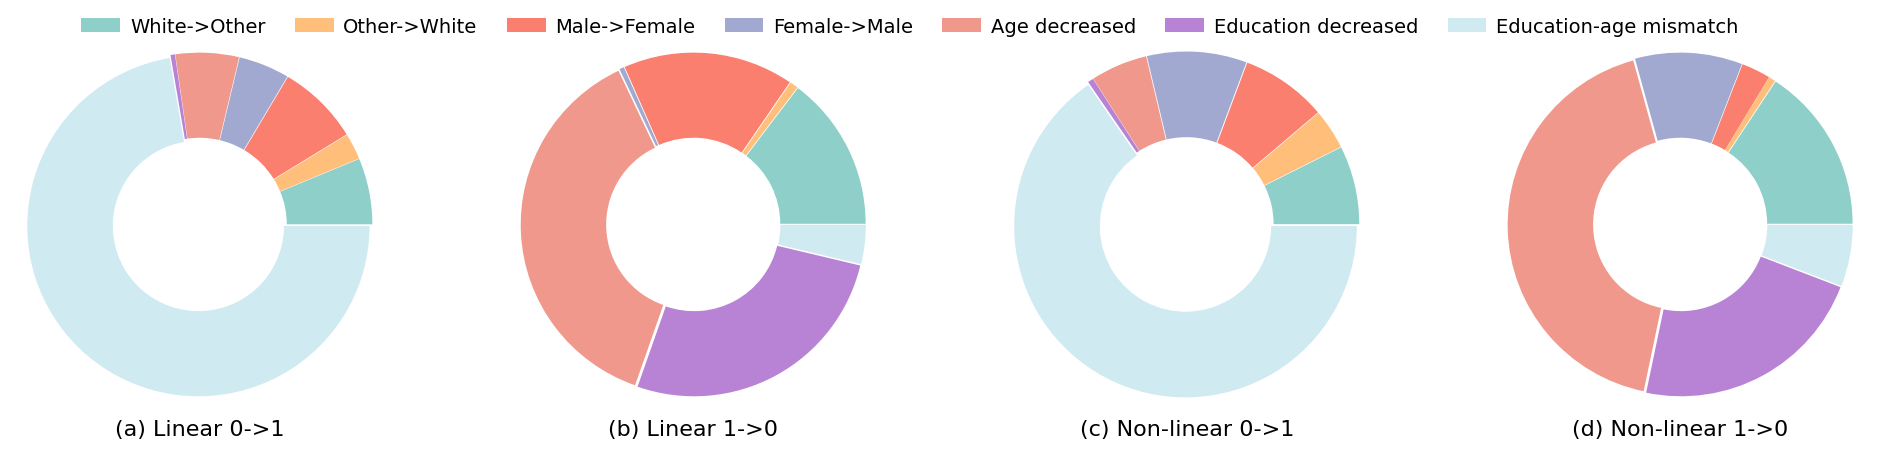

In [32]:
import matplotlib.pyplot as plt

labels = 'White->Other', 'Other->White', 'Male->Female', 'Female->Male', 'Age decreased', 'Education decreased', 'Education-age mismatch'
sizes = [[359, 142, 443, 275, 342, 24, 4140],
         [264, 14, 290, 8, 676, 479, 67],
         [439, 225, 482, 558, 318, 32, 3882],
         [315, 13, 55, 203, 850, 449, 117]]
colors = ['#8ECFC9', '#FFBE7A', '#FA7F6F', '#A1A9D0', '#F0988C', '#B883D4',
          '#CFEAF1', '#C4A5DE']
explode = (0.01,)*7
fig, axes = plt.subplots(1, 4, figsize=(24, 6))
subtitles = ['(a) Linear 0->1', '(b) Linear 1->0', '(c) Non-linear 0->1', '(d) Non-linear 1->0']

i = 0
for ax, title in zip(axes, subtitles):
    wedges, texts, autotexts = ax.pie(sizes[i], explode=explode, colors=colors,
                          autopct='', startangle=0,
                          wedgeprops={'width': 0.5},
                          pctdistance=0.88,
                          textprops={'fontsize': 15})

    ax.set_xlabel(title, fontsize=16)
    ax.axis('equal')

    for text in texts:
        text.set_color('#555555')
    for autotext in autotexts:
        autotext.set_color('#555555')
    i+=1

fig.legend(wedges, labels,
          loc='lower center',
          ncol=7,
          frameon=False,
          fontsize=14,
          columnspacing=1.5,
          bbox_to_anchor=(0.5, 0.85),
          handletextpad=0.5)

plt.subplots_adjust(wspace=0.3,
                    bottom=0.25)

plt.show()

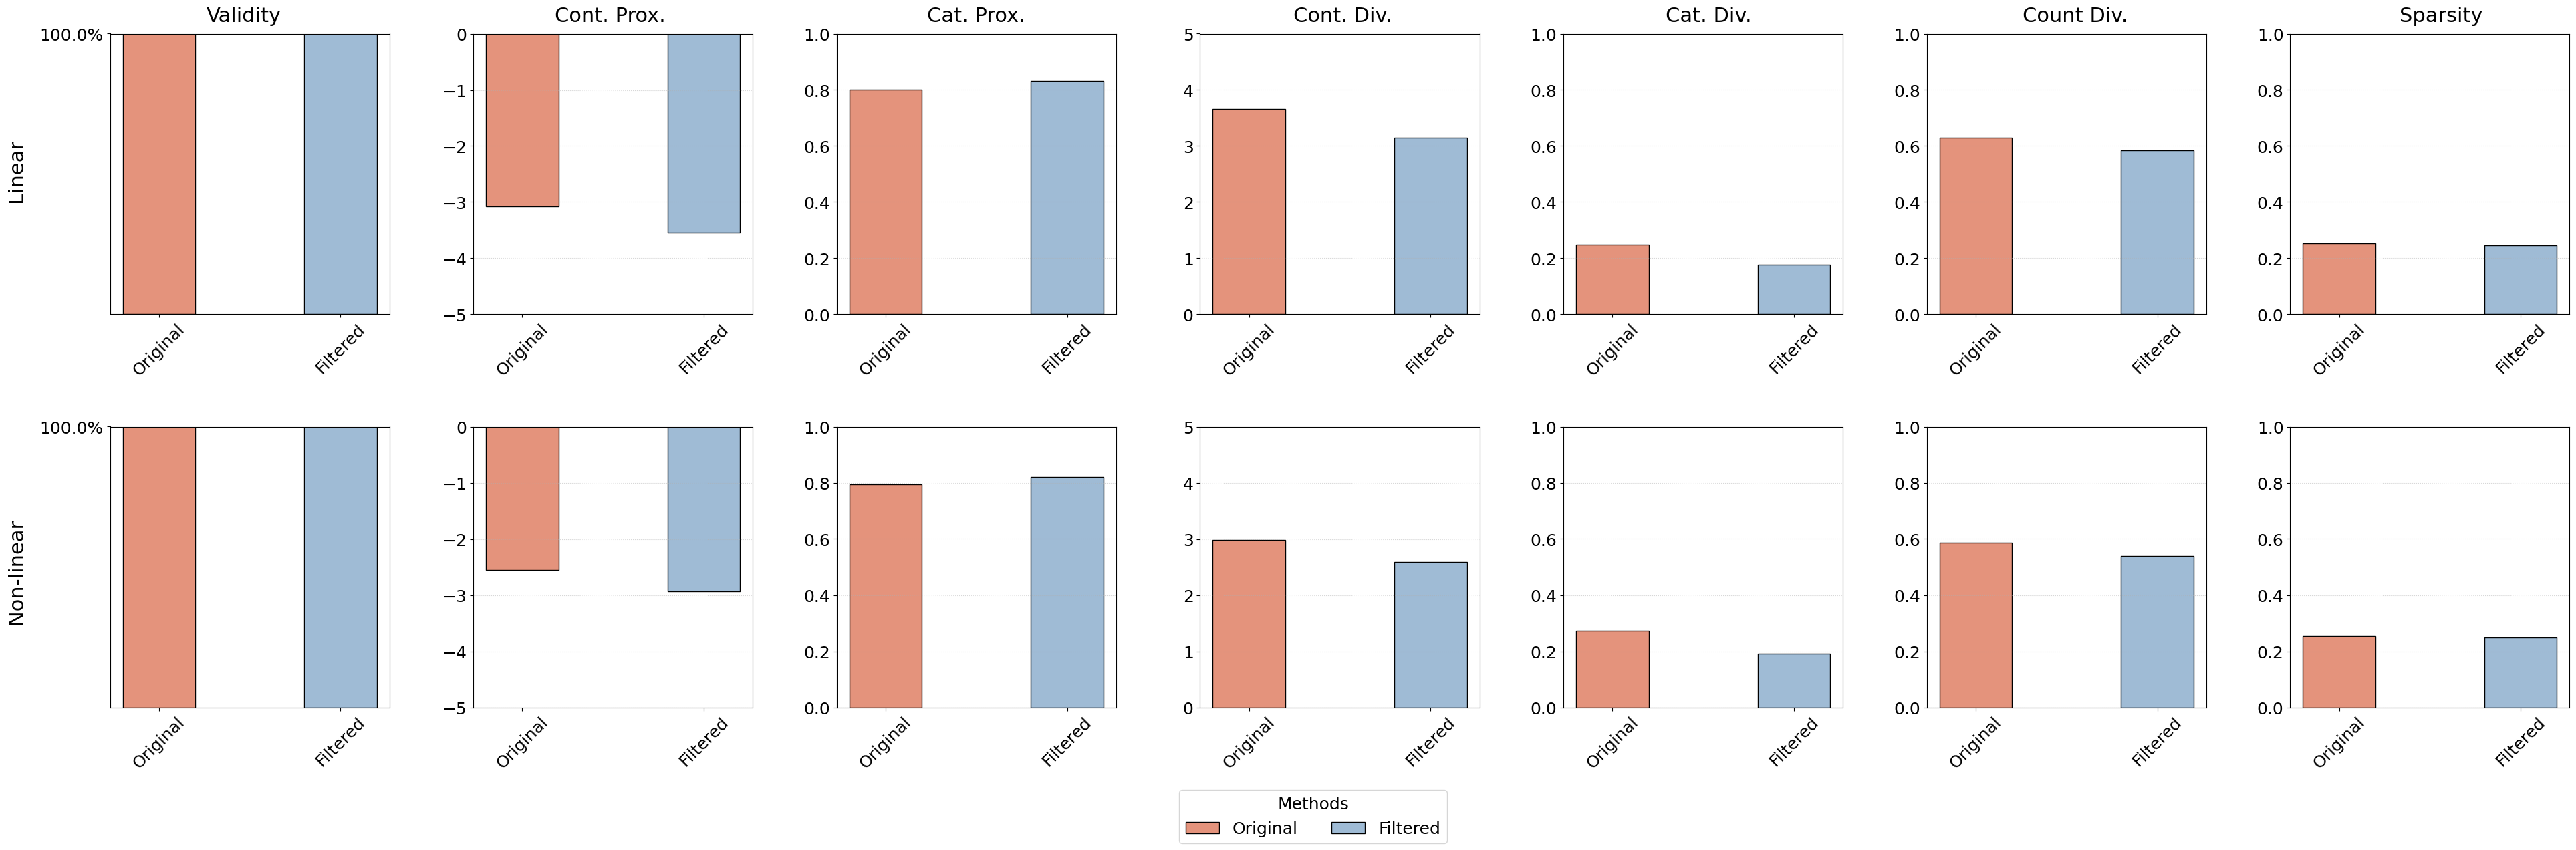

In [35]:
import matplotlib.pyplot as plt

data = [
    {"Method": "LogReg (Original)", "Validity": 100.0, "Cont. Prox.": -3.0761, "Cat. Prox.": 0.8010,
     "Cont. Div.": 3.6581, "Cat. Div.": 0.2486, "Count Div.": 0.6295, "Sparsity": 0.2527},
    {"Method": "LogReg (Filtered)", "Validity": 100.0, "Cont. Prox.": -3.5378, "Cat. Prox.": 0.8310,
     "Cont. Div.": 3.1528, "Cat. Div.": 0.1763, "Count Div.": 0.5840, "Sparsity": 0.2470},
    {"Method": "MLP (Original)", "Validity": 100.0, "Cont. Prox.": -2.5579, "Cat. Prox.": 0.7942,
     "Cont. Div.": 2.9823, "Cat. Div.": 0.2728, "Count Div.": 0.5869, "Sparsity": 0.2545},
    {"Method": "MLP (Filtered)", "Validity": 100.0, "Cont. Prox.": -2.9397, "Cat. Prox.": 0.8209,
     "Cont. Div.": 2.5932, "Cat. Div.": 0.1907, "Count Div.": 0.5390, "Sparsity": 0.2496}
]

plt.rcParams.update({
    'font.size': 18,
    'axes.titlesize': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 18,
    'ytick.labelsize': 18,
    'legend.fontsize': 18,
    'legend.title_fontsize': 18
})

colors = {"Original": "#E4937C", "Filtered": "#9fbbd5"}
metrics = ["Validity", "Cont. Prox.", "Cat. Prox.", "Cont. Div.", "Cat. Div.", "Count Div.", "Sparsity"]

y_limits = {
    "Validity": (0, 100),
    "Cont. Prox.": (-5, 0),
    "Cat. Prox.": (0, 1.0),
    "Cont. Div.": (0, 5),
    "Cat. Div.": (0, 1),
    "Count Div.": (0.0, 1.0),
    "Sparsity": (0, 1.0)
}


fig, axs = plt.subplots(2, 7, figsize=(40, 12),
                       gridspec_kw={"left":0.05, "right":0.97, "top":0.92, "bottom":0.08})
plt.subplots_adjust(hspace=0.4, wspace=0.3, bottom=0.3)


for col_idx, metric in enumerate(metrics):
    fig.text(x=0.1 + col_idx*0.137,
            y=0.93,
            s=metric,
            ha="center",
            va="bottom",
            fontsize=22)

model_labels = ["Linear", "Non-linear"]
for row_idx, label in enumerate(model_labels):
    fig.text(x=0.015,
            y=0.75 - row_idx*0.5,
            s=label,
            rotation=90,
            ha="center",
            va="center",
            fontsize=22)

model_groups = {
    "Linear": [d for d in data if "LogReg" in d["Method"]],
    "Non-linear": [d for d in data if "MLP" in d["Method"]]
}

for row_idx, model_type in enumerate(model_labels):
    models = model_groups[model_type]

    for col_idx, metric in enumerate(metrics):
        ax = axs[row_idx, col_idx]
        variants = [m["Method"].split("(")[-1].split(")")[0].strip() for m in models]
        values = [m[metric] for m in models]

        bars = ax.bar(variants, values,
                    color=[colors[v] for v in variants],
                    edgecolor="black",
                    width=0.4)

        ax.set_ylim(y_limits[metric])
        ax.tick_params(axis="x", rotation=45, labelsize=18)
        ax.tick_params(axis="y", labelsize=18)
        ax.grid(axis="y", linestyle=":", alpha=0.5)


        for spine in ax.spines.values():
            spine.set_visible(True)


        if metric == "Validity":
            ax.yaxis.set_major_formatter('{x:.1f}%')
            ax.set_yticks([100.0])


legend_handles = [plt.Rectangle((0,0),1,1, color=colors[v], ec="black") for v in colors]
fig.legend(
    handles=legend_handles,
    labels=colors.keys(),
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=2,
    title="Methods",
    fontsize=18,
    frameon=True,
    borderaxespad=0.5
)

plt.show()

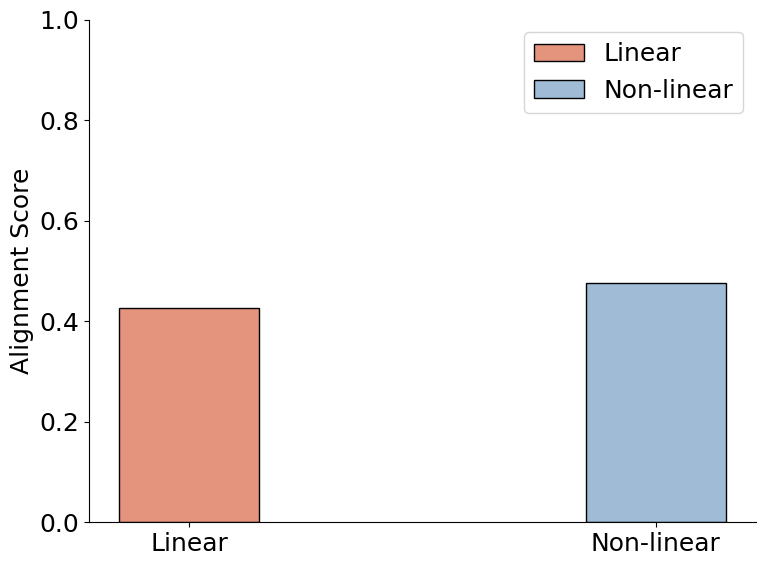

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14

models = ['Linear', 'Non-linear']

values = [0.4266666666666668, 0.4766666666666666]


x = np.arange(len(models))
bar_width = 0.3
offset = 1.2

plt.figure(figsize=(8, 6))


plt.bar(x[0], values[0], width=bar_width,
        color='#E4937C', edgecolor='black', label='Linear')
plt.bar(x[1], values[1], width=bar_width,
        color='#9fbbd5', edgecolor='black', label='Non-linear')


plt.xticks(x, models, fontsize=18)
plt.ylabel('Alignment Score', fontsize=18)

handles = [
    plt.Rectangle((0,0),1,1, fc='#E4937C', edgecolor='black'),
    plt.Rectangle((0,0),1,1, fc='#9fbbd5', edgecolor='black')
]
plt.legend(handles, ['Linear', 'Non-linear'], loc='upper right', frameon=True)

plt.ylim(0, 1)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()